In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cust = pd.read_csv('Mall_Customers.csv')
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
cust.shape

(200, 5)

In [4]:
cust.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
cust.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
def get_nulls(cust):
    print("cust:")
    print(pd.isnull(cust).sum())
get_nulls(cust)

cust:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
cust.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
cust['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [9]:
cust['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

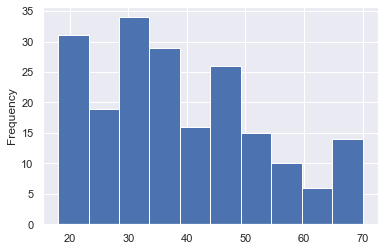

In [10]:
cust['Age'].plot(kind='hist')

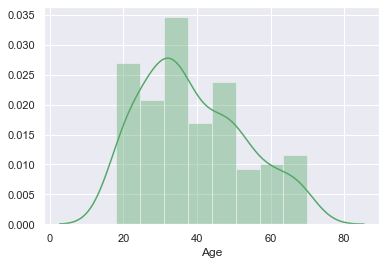

In [11]:
sns.distplot(cust['Age'], color = 'g')

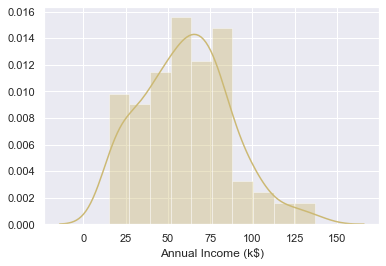

In [12]:
sns.distplot(cust['Annual Income (k$)'], color = 'y')

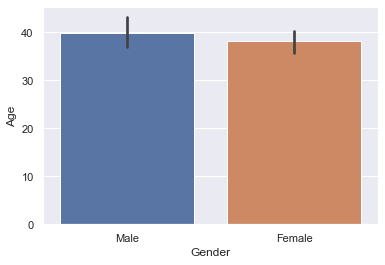

In [13]:
sns.barplot(x='Gender', y= 'Age', data= cust)

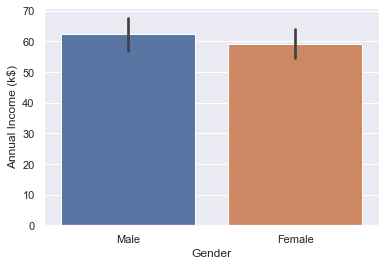

In [14]:
sns.barplot(x='Gender', y= 'Annual Income (k$)', data= cust)

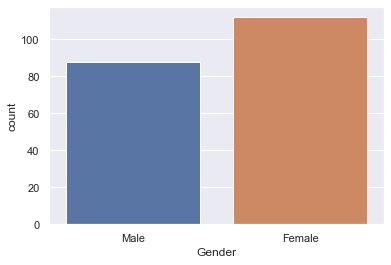

In [15]:
sns.countplot(x='Gender', data=cust)

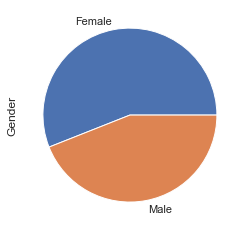

In [16]:
cust['Gender'].value_counts().plot.pie()

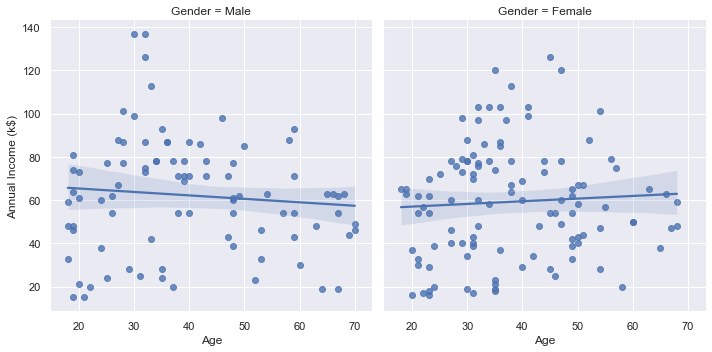

In [17]:
sns.lmplot(x='Age', y='Annual Income (k$)', col = 'Gender', data = cust)

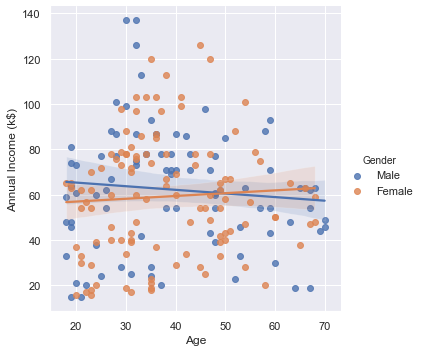

In [18]:
sns.lmplot(x='Age', y='Annual Income (k$)', hue = 'Gender', data = cust)

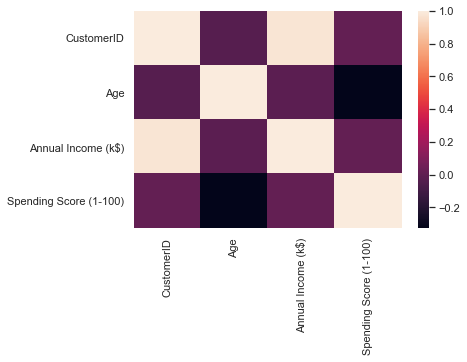

In [19]:
sns.heatmap(cust.corr())

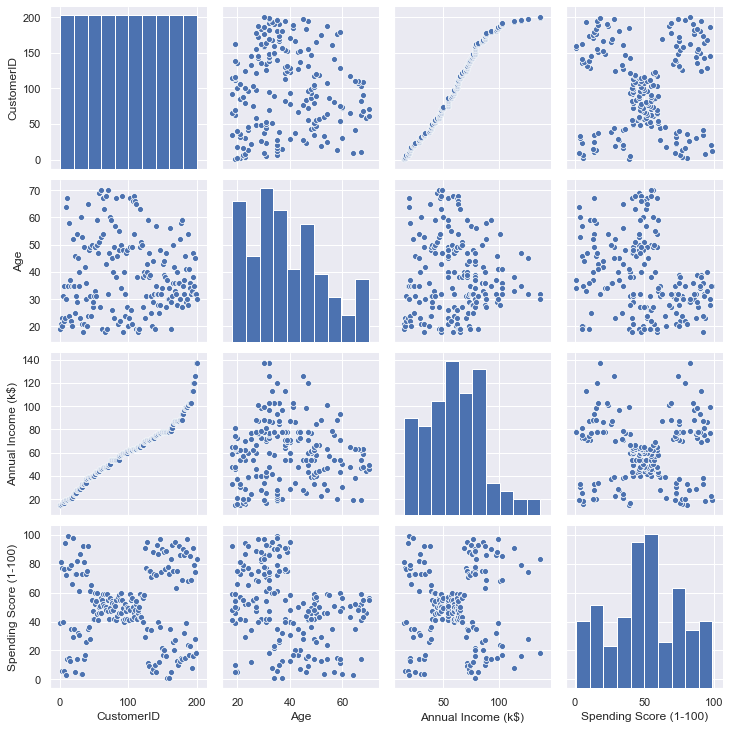

In [20]:
sns.pairplot(cust)

In [21]:
cust.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [22]:
X = cust.iloc[:, [3,4]]
X.head ()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [23]:
X = cust.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

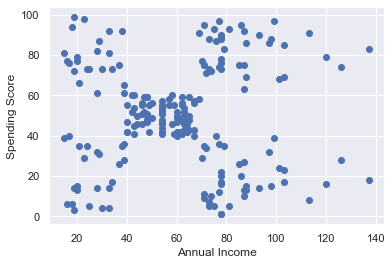

In [24]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel ('Annual Income')
plt.ylabel ('Spending Score')
plt.show()

In [25]:
from sklearn.cluster import KMeans

In [26]:
SSE = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

In [27]:
SSE

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30273.394312070042,
 25018.576334776335,
 21850.165282585633,
 19664.685196005543,
 17602.19046838677,
 16115.215606639838,
 14600.44364738564,
 13450.08023381847,
 12038.745689262341,
 11116.622080860318,
 10229.456024531024,
 9517.592890442891,
 9038.027227603314,
 8144.752868628955]

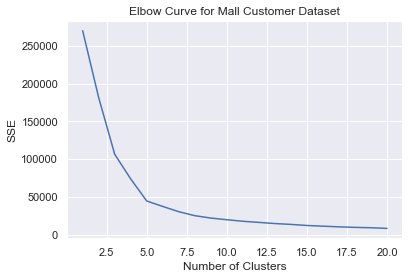

In [28]:
plt.plot(range(1,21), SSE)
plt.title ('Elbow Curve for Mall Customer Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y_kmeans = kmeans.fit_predict(X)
Y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [30]:
X[Y_kmeans==0,0]

array([39, 40, 40, 40, 40, 42, 42, 43, 43, 43, 43, 44, 44, 46, 46, 46, 46,
       47, 47, 48, 48, 48, 48, 48, 48, 49, 49, 50, 50, 54, 54, 54, 54, 54,
       54, 54, 54, 54, 54, 54, 54, 57, 57, 58, 58, 59, 59, 60, 60, 60, 60,
       60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64,
       64, 65, 65, 65, 65, 67, 67, 67, 67, 69, 71, 72, 76], dtype=int64)

In [31]:
X[Y_kmeans==0,1]

array([61, 55, 47, 42, 42, 52, 60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55,
       52, 59, 51, 59, 50, 48, 59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52,
       42, 51, 55, 41, 44, 57, 46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52,
       47, 50, 42, 49, 41, 48, 59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42,
       46, 48, 50, 43, 59, 43, 57, 56, 40, 58, 35, 34, 40], dtype=int64)

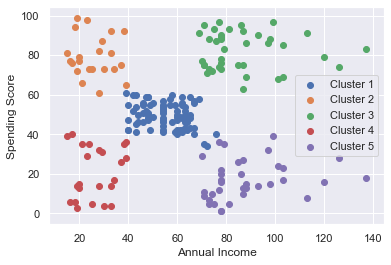

In [32]:
plt.scatter (X[Y_kmeans== 0,0], X[Y_kmeans==0,1], label = 'Cluster 1')
plt.scatter (X[Y_kmeans== 1,0], X[Y_kmeans==1,1], label = 'Cluster 2')
plt.scatter (X[Y_kmeans== 2,0], X[Y_kmeans==2,1], label = 'Cluster 3')
plt.scatter (X[Y_kmeans== 3,0], X[Y_kmeans==3,1], label = 'Cluster 4')
plt.scatter (X[Y_kmeans== 4,0], X[Y_kmeans==4,1], label = 'Cluster 5')
plt.xlabel ('Annual Income')
plt.ylabel ('Spending Score')
plt.legend()
plt.show()

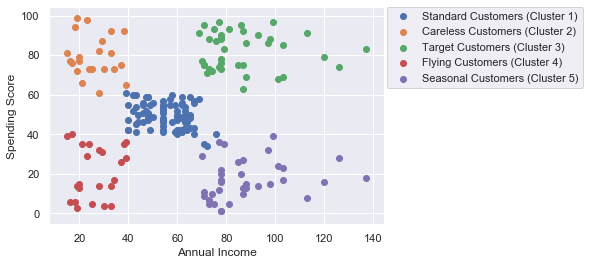

In [33]:
plt.scatter (X[Y_kmeans== 0,0], X[Y_kmeans==0,1], label = 'Standard Customers (Cluster 1)')
plt.scatter (X[Y_kmeans== 1,0], X[Y_kmeans==1,1], label = 'Careless Customers (Cluster 2)')
plt.scatter (X[Y_kmeans== 2,0], X[Y_kmeans==2,1], label = 'Target Customers (Cluster 3)')
plt.scatter (X[Y_kmeans== 3,0], X[Y_kmeans==3,1], label = 'Flying Customers (Cluster 4)')
plt.scatter (X[Y_kmeans== 4,0], X[Y_kmeans==4,1], label = 'Seasonal Customers (Cluster 5)')
plt.xlabel ('Annual Income')
plt.ylabel ('Spending Score')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

In [34]:
cust['Cluster_Group'] = Y_kmeans
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
0,1,Male,19,15,39,3
1,2,Male,21,15,81,1
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,3


In [35]:
cust.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Group
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4
199,200,Male,30,137,83,2


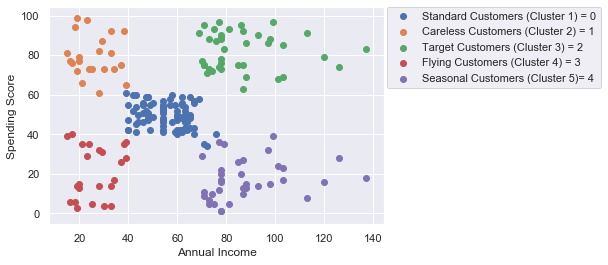

In [36]:
plt.scatter (X[Y_kmeans== 0,0], X[Y_kmeans==0,1], label = 'Standard Customers (Cluster 1) = 0')
plt.scatter (X[Y_kmeans== 1,0], X[Y_kmeans==1,1], label = 'Careless Customers (Cluster 2) = 1')
plt.scatter (X[Y_kmeans== 2,0], X[Y_kmeans==2,1], label = 'Target Customers (Cluster 3) = 2')
plt.scatter (X[Y_kmeans== 3,0], X[Y_kmeans==3,1], label = 'Flying Customers (Cluster 4) = 3')
plt.scatter (X[Y_kmeans== 4,0], X[Y_kmeans==4,1], label = 'Seasonal Customers (Cluster 5)= 4')
plt.xlabel ('Annual Income')
plt.ylabel ('Spending Score')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

### cust.Customer_Type[cust.Customer_Type == 0] = 'Standard'
### cust.Customer_Type[cust.Customer_Type == 1] = 'Careless'
### cust.Customer_Type[cust.Customer_Type == 2] = 'Target'
### cust.Customer_Type[cust.Customer_Type == 3] = 'Flying'
### cust.Customer_Type[cust.Customer_Type == 4] = 'Seasonal'

In [37]:
cust.shape

(200, 6)

In [38]:
X = cust.drop(['CustomerID', 'Gender', 'Age','Cluster_Group'], axis=1)
y = cust['Cluster_Group']
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 2) (40, 2) (160,) (40,)


### Using K-Neighbors Classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [41]:
k_range = range (1,15)
scores = {}
scores_list = []
error = []

In [42]:
for k in k_range:
    knn = KNeighborsClassifier (n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict (X_test)
    scores[k] = metrics.accuracy_score (y_test, y_pred)
    scores_list.append (metrics.accuracy_score(y_test, y_pred))
    error.append(np.mean( y_pred != y_test))

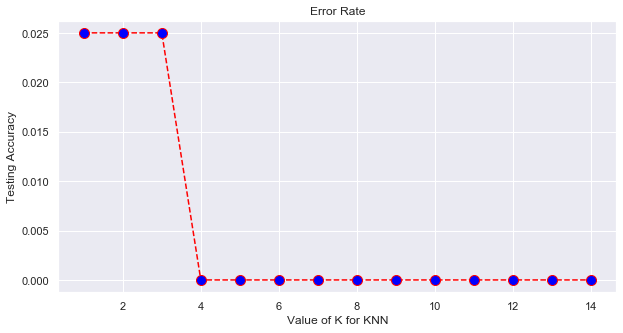

In [43]:
plt.figure(figsize= (10,5))
plt.plot(range(1,15), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title ('Error Rate')
plt.xlabel ('Value of K for KNN')
plt.ylabel ('Testing Accuracy')
plt.show()

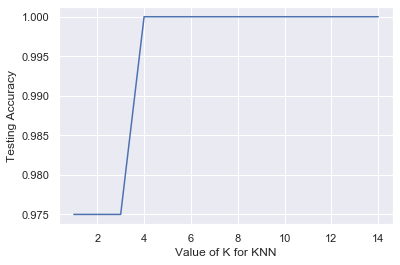

In [44]:
plt.plot(range(1, 15), scores_list)
plt.xlabel ('Value of K for KNN')
plt.ylabel ('Testing Accuracy')
plt.show()

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
print (confusion_matrix(y_test, y_pred))

[[16  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  8  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0  7]]


In [47]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         7

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



#### K-Neighbors Classifier accuracy is 100%

### Using Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dtree = DecisionTreeClassifier(random_state = 40)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

In [50]:
print(f'Model Accuracy : {dtree.score(X_train, y_train)}')

Model Accuracy : 1.0


In [51]:
print(f'Model Accuracy : {knn.score(X_train, y_train)}')

Model Accuracy : 0.96875


In [52]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         3
           4       0.86      0.86      0.86         7

    accuracy                           0.95        40
   macro avg       0.96      0.96      0.96        40
weighted avg       0.95      0.95      0.95        40



#### Decision Tree Classifier accuracy is 95%

### Using Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rand_fc = RandomForestClassifier(n_estimators=200, random_state=40)
rand_fc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=40, verbose=0,
                       warm_start=False)

In [55]:
n_nodes = []
max_depths = []

for ind_tree in rand_fc.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

In [56]:
rand_fc_pred = rand_fc.predict(X_test)
print(classification_report(y_test, rand_fc_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         3
           4       0.88      1.00      0.93         7

    accuracy                           0.97        40
   macro avg       0.97      0.99      0.98        40
weighted avg       0.98      0.97      0.98        40



#### Random Forest Classifier accuracy is 97%

In [57]:
print(f'Model Accuracy Random Forest Classifier: {rand_fc.score(X_train, y_train)}')

Model Accuracy Random Forest Classifier: 1.0


### Using Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 

In [59]:
lr.fit(X_train,y_train)

C:\Users\Raja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
pred = lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         3
           4       0.78      1.00      0.88         7

    accuracy                           0.95        40
   macro avg       0.96      0.97      0.96        40
weighted avg       0.96      0.95      0.95        40



#### Logistic Regression accuracy is 95%

In [61]:
print(f'Model Accuracy Logistic Regression: {lr.score(X_train, y_train)}')

Model Accuracy Logistic Regression: 1.0


### So using K-Neighbors Classifier for further process.

### SOME PREDICTIONS using K-Neighbors Classifier :

In [62]:
data = [[130, 85], [140, 55]]
cust_new = pd.DataFrame(data, columns = ['Annual Income','Spending Score']) 
cust_new

,Annual Income,Spending Score
0,130,85
1,140,55


### cust.Customer_Type[cust.Customer_Type == 0] = 'Standard'
### cust.Customer_Type[cust.Customer_Type == 1] = 'Careless'
### cust.Customer_Type[cust.Customer_Type == 2] = 'Target'
### cust.Customer_Type[cust.Customer_Type == 3] = 'Flying'
### cust.Customer_Type[cust.Customer_Type == 4] = 'Seasonal'¶

In [65]:
result = knn.predict(cust_new)
cust_new['Customer_Type'] = result
cust_new

,Annual Income,Spending Score,Customer_Type
0,130,85,2
1,140,55,2


In [66]:
data1 = [[180, 80], [19, 20], [22, 75]]
cust_new1 = pd.DataFrame(data1, columns = ['Annual Income','Spending Score']) 
cust_new1

,Annual Income,Spending Score
0,180,80
1,19,20
2,22,75


In [67]:
result = knn.predict(cust_new1)
cust_new1['Cluster'] = result
cust_new1

,Annual Income,Spending Score,Cluster
0,180,80,2
1,19,20,3
2,22,75,1


### SOME PREDICTIONS using Random Forest Classifier :

In [69]:
data1 = [[180, 80], [19, 20], [22, 75]]
cust_new2 = pd.DataFrame(data1, columns = ['Annual Income','Spending Score']) 
cust_new2

,Annual Income,Spending Score
0,180,80
1,19,20
2,22,75


In [70]:
result2 = rand_fc.predict(cust_new2)
cust_new2['Cluster'] = result2
cust_new2

,Annual Income,Spending Score,Cluster
0,180,80,2
1,19,20,3
2,22,75,1


### Creating Pickle file named 'cust_knn.pkl' using K-Neighbors Classifier Model:

In [71]:
import pickle as pkl
pkl.dump(knn, open ('cust_knn.pkl', 'wb'))

### Creating Pickle file named 'cust_rand_fc.pkl' using Random Forest Classifier Model:

In [72]:
pkl.dump(rand_fc, open ('cust_rand_fc.pkl', 'wb'))